In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/delaney-mordred.csv")
X = df.loc[:, df.columns.str.startswith("mordred_")]
y = df["logS"]
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y)
print(X_train.shape, X_test.shape)

(556, 1613) (186, 1613)


In [ ]:
from lightgbm import LGBMRegressor

model = LGBMRegressor()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 172784
[LightGBM] [Info] Number of data points in the train set: 556, number of used features: 1258
[LightGBM] [Info] Start training from score -3.022545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

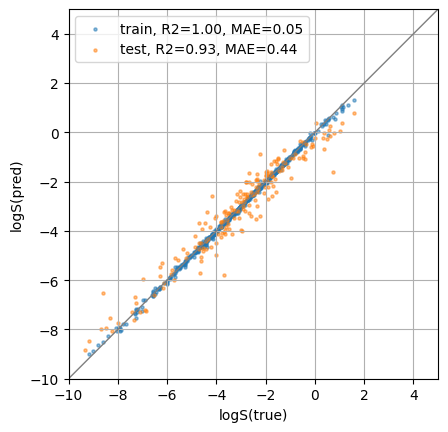

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

fig = plt.figure()
ax = fig.add_subplot(111)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
ax.scatter(
    y_train,
    y_train_pred,
    s=5,
    alpha=0.5,
    label=f"train, R2={r2_train:.2f}, MAE={mae_train:.2f}",
)
ax.scatter(
    y_test,
    y_test_pred,
    s=5,
    alpha=0.5,
    label=f"test, R2={r2_test:.2f}, MAE={mae_test:.2f}",
)

ax.legend()
ax.plot([-10, 5], [-10, 5], linewidth=1, color="tab:gray")
ax.set_xlabel("logS(true)")
ax.set_ylabel("logS(pred)")
ax.set_xlim(y.min(), y.max())
ax.set_ylim(y.min(), y.max())
ax.set_aspect("equal")
ax.set_xlim(-10, 5)
ax.set_ylim(-10, 5)
ax.legend()
ax.grid()
ax.label_outer()

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X=X_train)

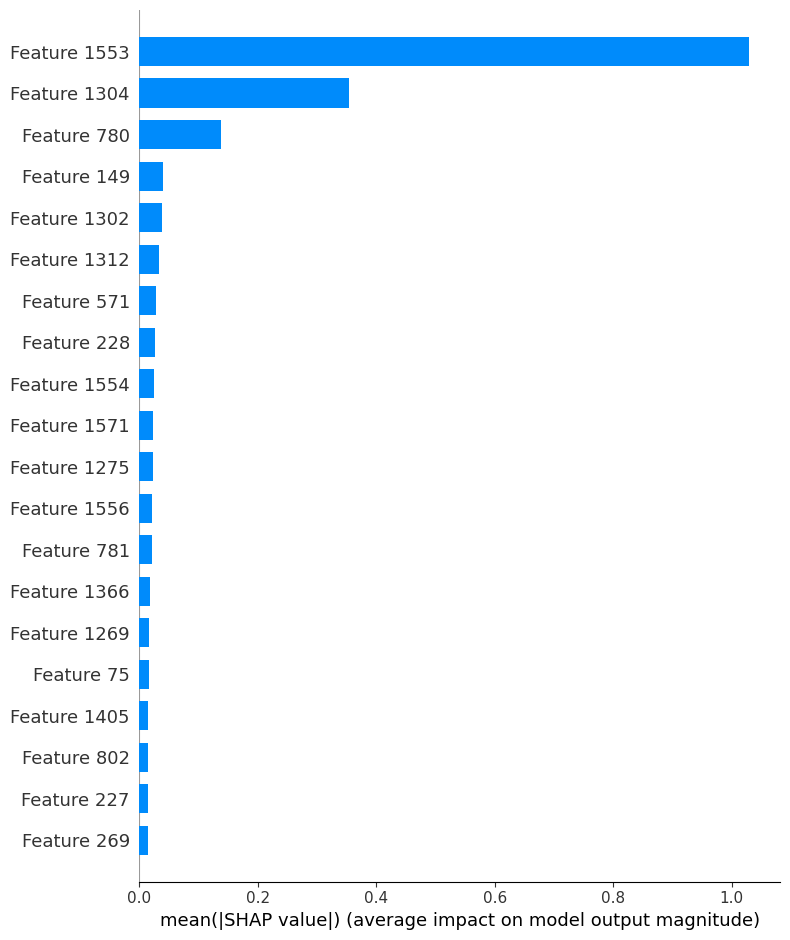

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

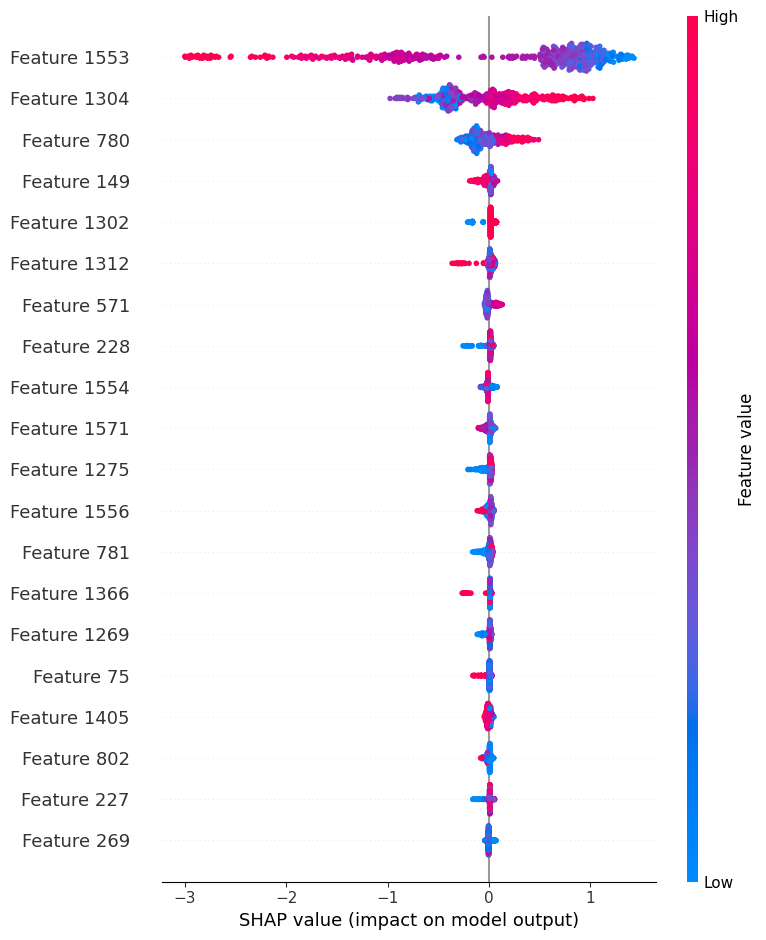

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    pd.DataFrame(X_train, columns=X.columns).iloc[0, :],
)